In [1]:
# Librerias generales
import pandas as pd
import numpy as np
import re
# Librerias e visualización
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Lectura de base de datos
df = pd.read_csv('DBs\df_filtrado.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,servicio_habilitado,nrodoc,servicio_admite,via_ingreso,unidad_estrategica,tipo_egreso,transfusion_sangre,antibiotico,alta_medica,posible_alta,...,ulcera_de_pie_diabetico,remision,tiene_proximo_control,tipo_control,requiere_cita_de_morbilidad,ambito_segun_el_medico,numero_diagnosticos,sexo,edad,ciclo_vital
0,General adultos,309135,Hospitalizacion,Remitido,Hospitalizacion Adultos,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 2,Si,Medico,No,Ambulatorio,3,F,81.0,Vejez
1,General adultos,307903,Hospitalizacion,Remitido,Hospitalizacion Adultos,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 2,Si,Medico,No,Ambulatorio,1,F,89.0,Vejez
2,General adultos,312102,Urgencias Generales Piso 1,Urgencias,Hospitalizacion Adultos,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 2,ND,Sin clasificar,ND,Ambulatorio,0,F,82.0,Vejez
3,General adultos,309271,Urgencias Generales Sotano,Urgencias,Hospitalizacion Adultos,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 4,Si,Medico,Si,Domiciliario,0,F,84.0,Vejez
4,General adultos,308390,Urgencias Generales Sotano,Urgencias,Hospitalizacion Adultos,Alta Medica,No,Si,Si,Sin Informacion,...,No,Grupal 4,ND,Sin clasificar,ND,Sin clasificar,0,M,42.0,Adultez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,General adultos,313023,Urgencias Generales Sotano,Urgencias,Hospitalizacion Adultos,Alta Medica,No,Si,Si,Sin Informacion,...,No,Grupal 2,Si,Medico,No,Ambulatorio,2,F,73.0,Vejez
1469,Urgencias >= 24 horas,306992,Urgencias Generales Sotano,Urgencias,Urgencias,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 4,ND,Sin clasificar,ND,Sin clasificar,0,M,86.0,Vejez
1470,General adultos,310672,Urgencias Generales Sotano,Urgencias,Hospitalizacion Adultos,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 2,ND,Sin clasificar,ND,Sin clasificar,0,F,74.0,Vejez
1471,General adultos,306990,Urgencias Generales Sotano,Urgencias,Hospitalizacion Adultos,Alta Medica,No,No,Si,Sin Informacion,...,No,Grupal 4,ND,Sin clasificar,ND,Ambulatorio,0,M,96.0,Vejez


# <h1> Eliminación de variables

En el caso de las variables numéricas, se optó por excluir las siguientes debido a su alta concentración de datos, mayormente en un solo punto (0), lo que podría afectar negativamente la capacidad del modelo para proporcionar una explicación adecuada:    
* 'tiempo_en_segundos_(apoyo_monopodal)', 'hdl', 'cambio_de_tfg', 'meses_de_diferencia_entre_tfg'

In [3]:
df.drop(['tiempo_en_segundos_(apoyo_monopodal)', 'hdl', 'cambio_de_tfg', 'meses_de_diferencia_entre_tfg','auto-calificacion_nivel_de_ejercicio',
         'tiempo_en_segundos_(recorrer_5_metros)','indice_de_fragilidad_groningen','velocidad_(m/s)','glicemia','hemoglobina_glicada','colesterol_total','tasa_de_filtracion_glomerular_tfg2'], axis=1, inplace=True)

En el caso de las variables categóricas, se tomó la decisión de eliminar aquellas que tenían la mayoría de sus datos en la categoría 'sin clasificar' o 'no definido'. Esto se hizo con el objetivo de evitar posibles sesgos en el modelo, ya que la alta presencia de datos no categorizados dificultaba la identificación de las características específicas dentro de dicha variable: 
*  'posible_alta',  'test_findrisc', 'indice_tobillo/brazo', 'tiene_riesgo_de_tener_diabetes_mellitus', 'tiene_riesgo_de_tener_hta', 'tiene_proximo_control', 'tipo_control', 'requiere_cita_de_morbilidad',  'epoc_(clasificacion_bodex)', 

In [4]:
df.drop(['alta_medica','posible_alta',  'test_findrisc', 'indice_tobillo/brazo', 'tiene_riesgo_de_tener_diabetes_mellitus', 'tiene_riesgo_de_tener_hta', 'tiene_proximo_control', 'tipo_control', 'requiere_cita_de_morbilidad',  'epoc_(clasificacion_bodex)'], axis=1,inplace=True)

# <h1> Separación de datos

In [5]:
y=df[['tiempo_estancia']]
df.drop(['tiempo_estancia','nrodoc',], axis=1, inplace=True)
y

,tiempo_estancia
0,77.719108
1,302.528029
2,168.615411
3,90.240822
4,245.486805
...,...
1468,133.301420
1469,23.346871
1470,62.268748
1471,91.969748


In [6]:
# Se separan las variables categoricas
cat= df.select_dtypes(include=['object'])

In [7]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   servicio_habilitado                        1473 non-null   object
 1   servicio_admite                            1473 non-null   object
 2   via_ingreso                                1473 non-null   object
 3   unidad_estrategica                         1473 non-null   object
 4   tipo_egreso                                1473 non-null   object
 5   transfusion_sangre                         1473 non-null   object
 6   antibiotico                                1473 non-null   object
 7   tipo_diagnostico_principal                 1473 non-null   object
 8   dx_principal_egreso_capitulo               1473 non-null   object
 9   profesional_especialidad_grd               1473 non-null   object
 10  clasificacion_imc                   

In [8]:
columnas_a_eliminar = df.columns.intersection(cat.columns)

# Eliminar las columnas en categóricas que también están en numéricas
num = df.drop(columns=columnas_a_eliminar)
num2= num


In [9]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   peso                                      1473 non-null   float64
 1   talla                                     1473 non-null   float64
 2   imc                                       1473 non-null   float64
 3   saturacion_de_oxigeno_(%)                 1473 non-null   float64
 4   perimetro_muslo                           1473 non-null   int64  
 5   perimetro_cintura                         1473 non-null   float64
 6   pliegue_triceps                           1473 non-null   float64
 7   pliegue_abdomen                           1473 non-null   float64
 8   pliegue_muslo                             1473 non-null   float64
 9   sumatoria_pliegues                        1473 non-null   float64
 10  presion_arterial_sistolica          

# <h1> Transformación de variables

<h2> Categóricas

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
categorical_features = cat.columns
le = LabelEncoder()

for i in categorical_features:
    cat[i] = le.fit_transform(cat[i])

In [11]:
cat=cat.astype(int)

In [12]:
cat

,servicio_habilitado,servicio_admite,via_ingreso,unidad_estrategica,tipo_egreso,transfusion_sangre,antibiotico,tipo_diagnostico_principal,dx_principal_egreso_capitulo,profesional_especialidad_grd,...,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,clasificacion_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,ulcera_de_pie_diabetico,remision,ambito_segun_el_medico,sexo,ciclo_vital
0,2,3,1,1,0,0,0,1,1,17,...,0,1,1,2,2,0,1,0,0,2
1,2,3,1,1,0,0,0,1,1,17,...,0,1,1,7,2,0,1,0,0,2
2,2,5,2,1,0,0,0,0,6,17,...,1,1,1,2,2,0,1,0,0,2
3,2,6,2,1,0,0,0,0,7,2,...,0,1,1,3,4,0,3,1,0,2
4,2,6,2,1,0,0,1,0,8,14,...,0,1,1,0,4,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2,6,2,1,0,0,1,1,7,2,...,1,1,0,2,2,0,1,0,0,2
1469,3,6,2,3,0,0,0,0,15,19,...,1,1,1,4,4,0,3,2,1,2
1470,2,6,2,1,0,0,0,0,12,7,...,0,1,0,7,1,0,1,2,0,2
1471,2,6,2,1,0,0,0,0,6,17,...,1,1,1,7,4,0,3,0,1,2


In [13]:
all_columns = cat.columns.tolist()
for column in all_columns:
    print(column)

servicio_habilitado
servicio_admite
via_ingreso
unidad_estrategica
tipo_egreso
transfusion_sangre
antibiotico
tipo_diagnostico_principal
dx_principal_egreso_capitulo
profesional_especialidad_grd
clasificacion_imc
calificacion_(indice_de_fragilidad)
calificacion_(apoyo_monopodal)
calificacion_velocidad
diabetes_mellitus
control_diabetes
tiene_hta
control_hta
tiene_epoc
enfermedad_coronaria_(en_el_ãºltimo_aã±o)
insuficiencia_cardiaca
valvulopatia
arritmia_o_paciente_con_dispositivo
sufre_de_alguna_enfermedad_cardiovascular
tabaquismo
clasificacion_de_framinghan
estadio_de_la_enfermedad_renal
clase_funcional
ulcera_de_pie_diabetico
remision
ambito_segun_el_medico
sexo
ciclo_vital


<h2> Numéricas


In [14]:
#from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
#scaler = MinMaxScaler()

# Ajustar el escalador a tus datos (supongamos que tienes un DataFrame de pandas llamado 'data' con las características a escalar)
#scaler.fit(num)

# Transformar los datos y almacenarlos en una nueva variable
#num_sc = scaler.transform(num)

#num_sc= pd.DataFrame(num_sc, columns=num.columns)

In [15]:
num

,peso,talla,imc,saturacion_de_oxigeno_(%),perimetro_muslo,perimetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,sumatoria_pliegues,...,mets_-indice_metabolico,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,75.0,151.0,32.89,96.0,51,95.0,9.0,35.0,16.0,60.0,...,26187.0,91655.0,94.65,95.8,0.86,61.77,3.98,0.81,3,81.0
1,69.0,152.0,29.86,95.0,60,99.0,22.0,21.0,46.0,89.0,...,20638.0,72233.0,131.56,0.0,0.00,0.00,1.28,1.24,1,89.0
2,53.0,152.0,22.94,94.0,47,90.0,8.0,19.0,16.0,43.0,...,29302.0,102557.0,61.00,123.0,0.61,61.54,0.00,0.00,0,82.0
3,75.0,160.0,29.30,89.0,34,78.0,5.0,5.0,5.0,15.0,...,2869.0,100415.0,0.00,119.2,0.85,59.38,0.15,1.32,0,84.0
4,90.0,170.0,31.14,94.0,40,80.0,30.0,30.0,20.0,80.0,...,87662.0,306817.0,0.00,150.7,0.81,151.23,19.67,0.78,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,58.0,156.0,23.83,96.0,49,92.0,25.0,19.0,25.0,69.0,...,32189.0,112662.0,134.51,445.0,0.59,78.92,0.00,0.87,2,73.0
1469,63.0,167.0,22.59,96.0,36,62.0,10.0,10.0,10.0,30.0,...,57297.0,200539.0,0.00,70.1,1.12,42.19,2.15,1.18,0,86.0
1470,87.5,157.0,35.50,98.0,64,104.0,45.0,45.0,55.0,145.0,...,5645.0,197575.0,0.00,0.0,0.00,0.00,0.00,0.77,0,74.0
1471,46.0,167.0,16.49,96.0,40,83.0,5.0,13.0,8.0,26.0,...,70667.0,247335.0,0.00,0.0,0.00,0.00,0.00,0.00,0,96.0


In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes un DataFrame 'y' con una columna llamada 'tiempo_estancia'
scaler = MinMaxScaler()
y_sc = scaler.fit_transform(y[['tiempo_estancia']])

# Convertir y_sc en un DataFrame
y_sc = pd.DataFrame(y_sc, columns=['tiempo_estancia'])

y_sc




,tiempo_estancia
0,0.025919
1,0.124443
2,0.065755
3,0.031407
4,0.099444
...,...
1468,0.050278
1469,0.002090
1470,0.019148
1471,0.032165


In [17]:
num

,peso,talla,imc,saturacion_de_oxigeno_(%),perimetro_muslo,perimetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,sumatoria_pliegues,...,mets_-indice_metabolico,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,75.0,151.0,32.89,96.0,51,95.0,9.0,35.0,16.0,60.0,...,26187.0,91655.0,94.65,95.8,0.86,61.77,3.98,0.81,3,81.0
1,69.0,152.0,29.86,95.0,60,99.0,22.0,21.0,46.0,89.0,...,20638.0,72233.0,131.56,0.0,0.00,0.00,1.28,1.24,1,89.0
2,53.0,152.0,22.94,94.0,47,90.0,8.0,19.0,16.0,43.0,...,29302.0,102557.0,61.00,123.0,0.61,61.54,0.00,0.00,0,82.0
3,75.0,160.0,29.30,89.0,34,78.0,5.0,5.0,5.0,15.0,...,2869.0,100415.0,0.00,119.2,0.85,59.38,0.15,1.32,0,84.0
4,90.0,170.0,31.14,94.0,40,80.0,30.0,30.0,20.0,80.0,...,87662.0,306817.0,0.00,150.7,0.81,151.23,19.67,0.78,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,58.0,156.0,23.83,96.0,49,92.0,25.0,19.0,25.0,69.0,...,32189.0,112662.0,134.51,445.0,0.59,78.92,0.00,0.87,2,73.0
1469,63.0,167.0,22.59,96.0,36,62.0,10.0,10.0,10.0,30.0,...,57297.0,200539.0,0.00,70.1,1.12,42.19,2.15,1.18,0,86.0
1470,87.5,157.0,35.50,98.0,64,104.0,45.0,45.0,55.0,145.0,...,5645.0,197575.0,0.00,0.0,0.00,0.00,0.00,0.77,0,74.0
1471,46.0,167.0,16.49,96.0,40,83.0,5.0,13.0,8.0,26.0,...,70667.0,247335.0,0.00,0.0,0.00,0.00,0.00,0.00,0,96.0


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes un DataFrame 'df' con una columna llamada 'tiempo_estancia'
scaler = MinMaxScaler()
num_sc = scaler.fit_transform(num)

# Convertir df_scaled en un DataFrame
num_sc = pd.DataFrame(num_sc, columns=num.columns)
num_sc

,peso,talla,imc,saturacion_de_oxigeno_(%),perimetro_muslo,perimetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,sumatoria_pliegues,...,mets_-indice_metabolico,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,0.414414,0.350000,0.500611,0.902439,0.500000,0.633333,0.128571,0.388889,0.228571,0.303030,...,0.187534,0.187535,0.375595,0.068970,0.073067,0.214658,0.141486,0.065060,0.083333,0.765432
1,0.360360,0.366667,0.426582,0.878049,0.588235,0.660000,0.314286,0.233333,0.657143,0.449495,...,0.147796,0.147795,0.522063,0.000000,0.000000,0.000000,0.045503,0.099598,0.027778,0.864198
2,0.216216,0.366667,0.257513,0.853659,0.460784,0.600000,0.114286,0.211111,0.228571,0.217172,...,0.209841,0.209841,0.242063,0.088553,0.051827,0.213859,0.000000,0.000000,0.000000,0.777778
3,0.414414,0.500000,0.412900,0.731707,0.333333,0.520000,0.071429,0.055556,0.071429,0.075758,...,0.020546,0.205458,0.000000,0.085817,0.072218,0.206353,0.005332,0.106024,0.000000,0.802469
4,0.549550,0.666667,0.457855,0.853659,0.392157,0.533333,0.428571,0.333333,0.285714,0.404040,...,0.627776,0.627775,0.000000,0.108495,0.068819,0.525542,0.699253,0.062651,0.000000,0.283951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.261261,0.433333,0.279257,0.902439,0.480392,0.613333,0.357143,0.211111,0.357143,0.348485,...,0.230516,0.230517,0.533770,0.320374,0.050127,0.274256,0.000000,0.069880,0.055556,0.666667
1469,0.306306,0.616667,0.248962,0.902439,0.352941,0.413333,0.142857,0.111111,0.142857,0.151515,...,0.410322,0.410321,0.000000,0.050468,0.095157,0.146615,0.076431,0.094779,0.000000,0.827160
1470,0.527027,0.450000,0.564378,0.951220,0.627451,0.693333,0.642857,0.500000,0.785714,0.732323,...,0.040426,0.404256,0.000000,0.000000,0.000000,0.000000,0.000000,0.061847,0.000000,0.679012
1471,0.153153,0.616667,0.099927,0.902439,0.392157,0.553333,0.071429,0.144444,0.114286,0.131313,...,0.506069,0.506070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950617


# <h1> Correlaciones

In [19]:
cor_num = pd.concat([y_sc, num_sc], axis=1)

In [20]:
cor_num

,tiempo_estancia,peso,talla,imc,saturacion_de_oxigeno_(%),perimetro_muslo,perimetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,...,mets_-indice_metabolico,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,0.025919,0.414414,0.350000,0.500611,0.902439,0.500000,0.633333,0.128571,0.388889,0.228571,...,0.187534,0.187535,0.375595,0.068970,0.073067,0.214658,0.141486,0.065060,0.083333,0.765432
1,0.124443,0.360360,0.366667,0.426582,0.878049,0.588235,0.660000,0.314286,0.233333,0.657143,...,0.147796,0.147795,0.522063,0.000000,0.000000,0.000000,0.045503,0.099598,0.027778,0.864198
2,0.065755,0.216216,0.366667,0.257513,0.853659,0.460784,0.600000,0.114286,0.211111,0.228571,...,0.209841,0.209841,0.242063,0.088553,0.051827,0.213859,0.000000,0.000000,0.000000,0.777778
3,0.031407,0.414414,0.500000,0.412900,0.731707,0.333333,0.520000,0.071429,0.055556,0.071429,...,0.020546,0.205458,0.000000,0.085817,0.072218,0.206353,0.005332,0.106024,0.000000,0.802469
4,0.099444,0.549550,0.666667,0.457855,0.853659,0.392157,0.533333,0.428571,0.333333,0.285714,...,0.627776,0.627775,0.000000,0.108495,0.068819,0.525542,0.699253,0.062651,0.000000,0.283951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.050278,0.261261,0.433333,0.279257,0.902439,0.480392,0.613333,0.357143,0.211111,0.357143,...,0.230516,0.230517,0.533770,0.320374,0.050127,0.274256,0.000000,0.069880,0.055556,0.666667
1469,0.002090,0.306306,0.616667,0.248962,0.902439,0.352941,0.413333,0.142857,0.111111,0.142857,...,0.410322,0.410321,0.000000,0.050468,0.095157,0.146615,0.076431,0.094779,0.000000,0.827160
1470,0.019148,0.527027,0.450000,0.564378,0.951220,0.627451,0.693333,0.642857,0.500000,0.785714,...,0.040426,0.404256,0.000000,0.000000,0.000000,0.000000,0.000000,0.061847,0.000000,0.679012
1471,0.032165,0.153153,0.616667,0.099927,0.902439,0.392157,0.553333,0.071429,0.144444,0.114286,...,0.506069,0.506070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950617


In [21]:
cor_num.drop(['imc', 'saturacion_de_oxigeno_(%)', 'perimetro_cintura','sumatoria_pliegues', 'pliegue_abdomen', 'pliegue_muslo','mets_-indice_metabolico','presion_arterial_sistolica'], axis=1, inplace=True)

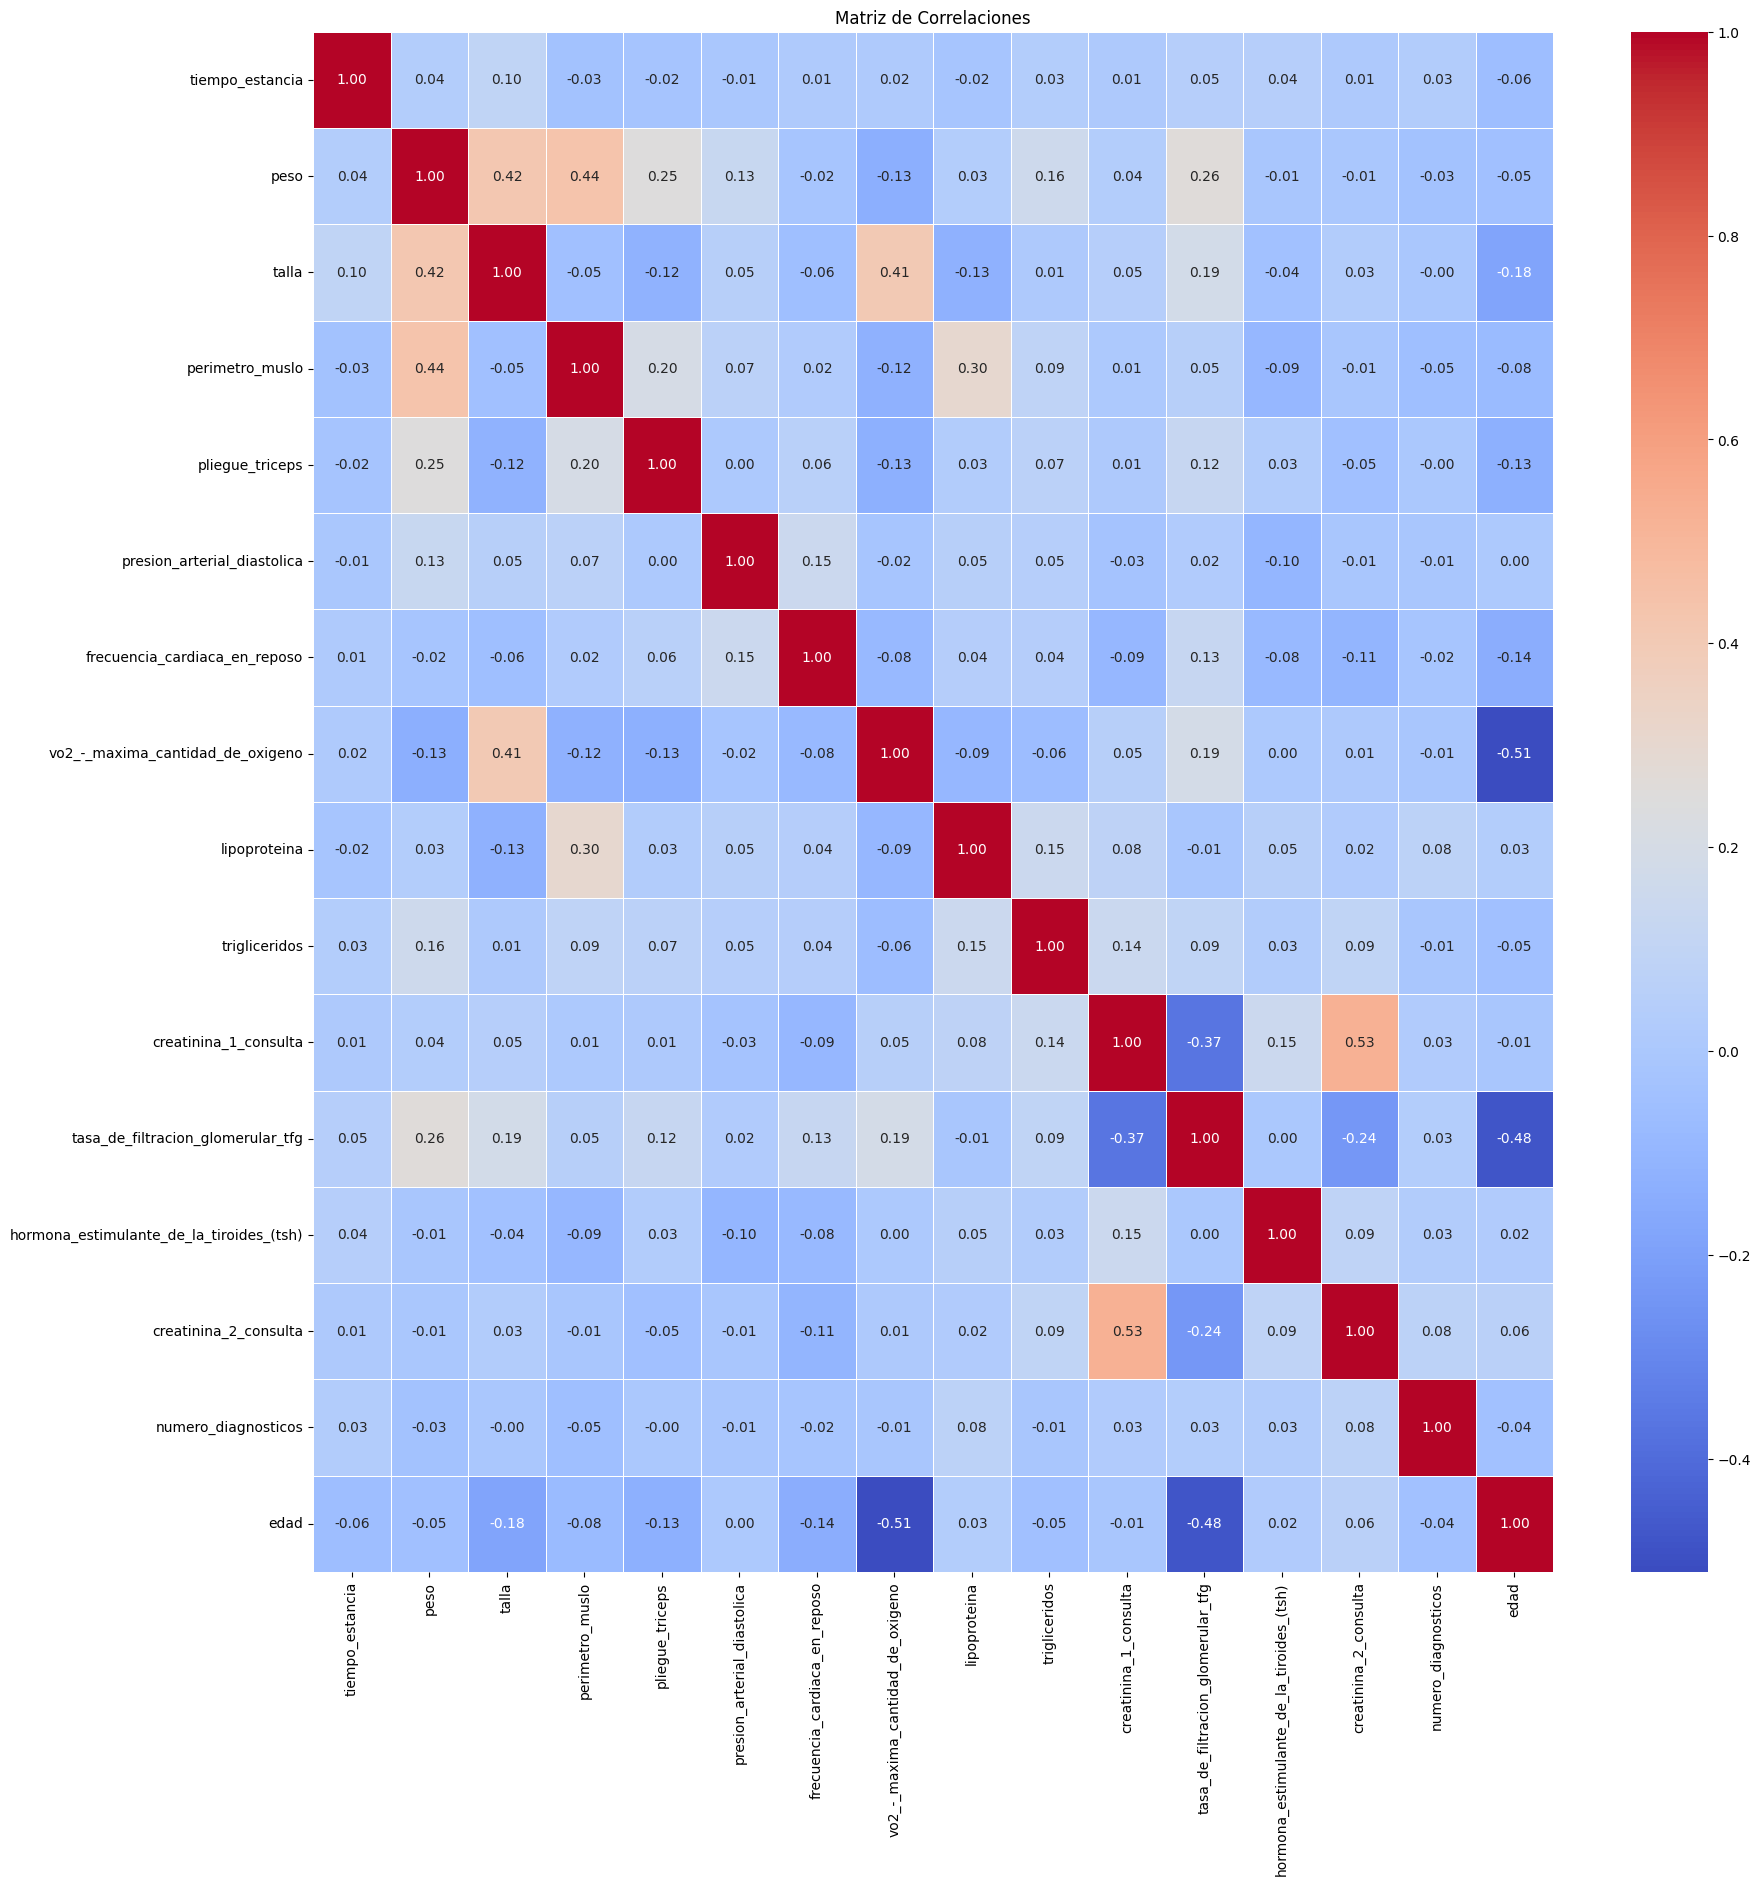

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'data' con las variables que deseas analizar
# data = pd.read_csv('tu_archivo.csv')  # Si los datos están en un archivo CSV

# Calcula la matriz de correlaciones
correlation_matrix = cor_num.corr()

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlaciones
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')

# Muestra el gráfico
plt.show()

Se ha decidido eliminar las variables de "perímetro de cintura" y "saturación de oxígeno" debido a su falta de correlación con la variable objetivo. Además, se optó por no incluir la variable "IMC" (Índice de Masa Corporal), ya que esta mostraba una alta correlación con las variables de "peso" y "talla."

In [23]:
cor_num.columns

Index(['tiempo_estancia', 'peso', 'talla', 'perimetro_muslo',
       'pliegue_triceps', 'presion_arterial_diastolica',
       'frecuencia_cardiaca_en_reposo', 'vo2_-_maxima_cantidad_de_oxigeno',
       'lipoproteina', 'trigliceridos', 'creatinina_1_consulta',
       'tasa_de_filtracion_glomerular_tfg',
       'hormona_estimulante_de_la_tiroides_(tsh)', 'creatinina_2_consulta',
       'numero_diagnosticos', 'edad'],
      dtype='object')

In [24]:
num2.drop(['imc', 'saturacion_de_oxigeno_(%)', 'perimetro_cintura','sumatoria_pliegues', 'pliegue_abdomen', 'pliegue_muslo','mets_-indice_metabolico','presion_arterial_sistolica'], axis=1, inplace=True)

<h2> Categóricas

In [25]:
cor_cat = pd.concat([y_sc, cat], axis=1)

In [26]:
cor_cat

,tiempo_estancia,servicio_habilitado,servicio_admite,via_ingreso,unidad_estrategica,tipo_egreso,transfusion_sangre,antibiotico,tipo_diagnostico_principal,dx_principal_egreso_capitulo,...,sufre_de_alguna_enfermedad_cardiovascular,tabaquismo,clasificacion_de_framinghan,estadio_de_la_enfermedad_renal,clase_funcional,ulcera_de_pie_diabetico,remision,ambito_segun_el_medico,sexo,ciclo_vital
0,0.025919,2,3,1,1,0,0,0,1,1,...,0,1,1,2,2,0,1,0,0,2
1,0.124443,2,3,1,1,0,0,0,1,1,...,0,1,1,7,2,0,1,0,0,2
2,0.065755,2,5,2,1,0,0,0,0,6,...,1,1,1,2,2,0,1,0,0,2
3,0.031407,2,6,2,1,0,0,0,0,7,...,0,1,1,3,4,0,3,1,0,2
4,0.099444,2,6,2,1,0,0,1,0,8,...,0,1,1,0,4,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.050278,2,6,2,1,0,0,1,1,7,...,1,1,0,2,2,0,1,0,0,2
1469,0.002090,3,6,2,3,0,0,0,0,15,...,1,1,1,4,4,0,3,2,1,2
1470,0.019148,2,6,2,1,0,0,0,0,12,...,0,1,0,7,1,0,1,2,0,2
1471,0.032165,2,6,2,1,0,0,0,0,6,...,1,1,1,7,4,0,3,0,1,2


In [33]:
cor_cat.drop(['remision', 'control_hta', 'calificacion_velocidad', 'calificacion_(indice_de_fragilidad)','diabetes_mellitus', 'tipo_diagnostico_principal','tipo_egreso','calificacion_(apoyo_monopodal)','insuficiencia_cardiaca','servicio_admite'], axis=1, inplace=True)

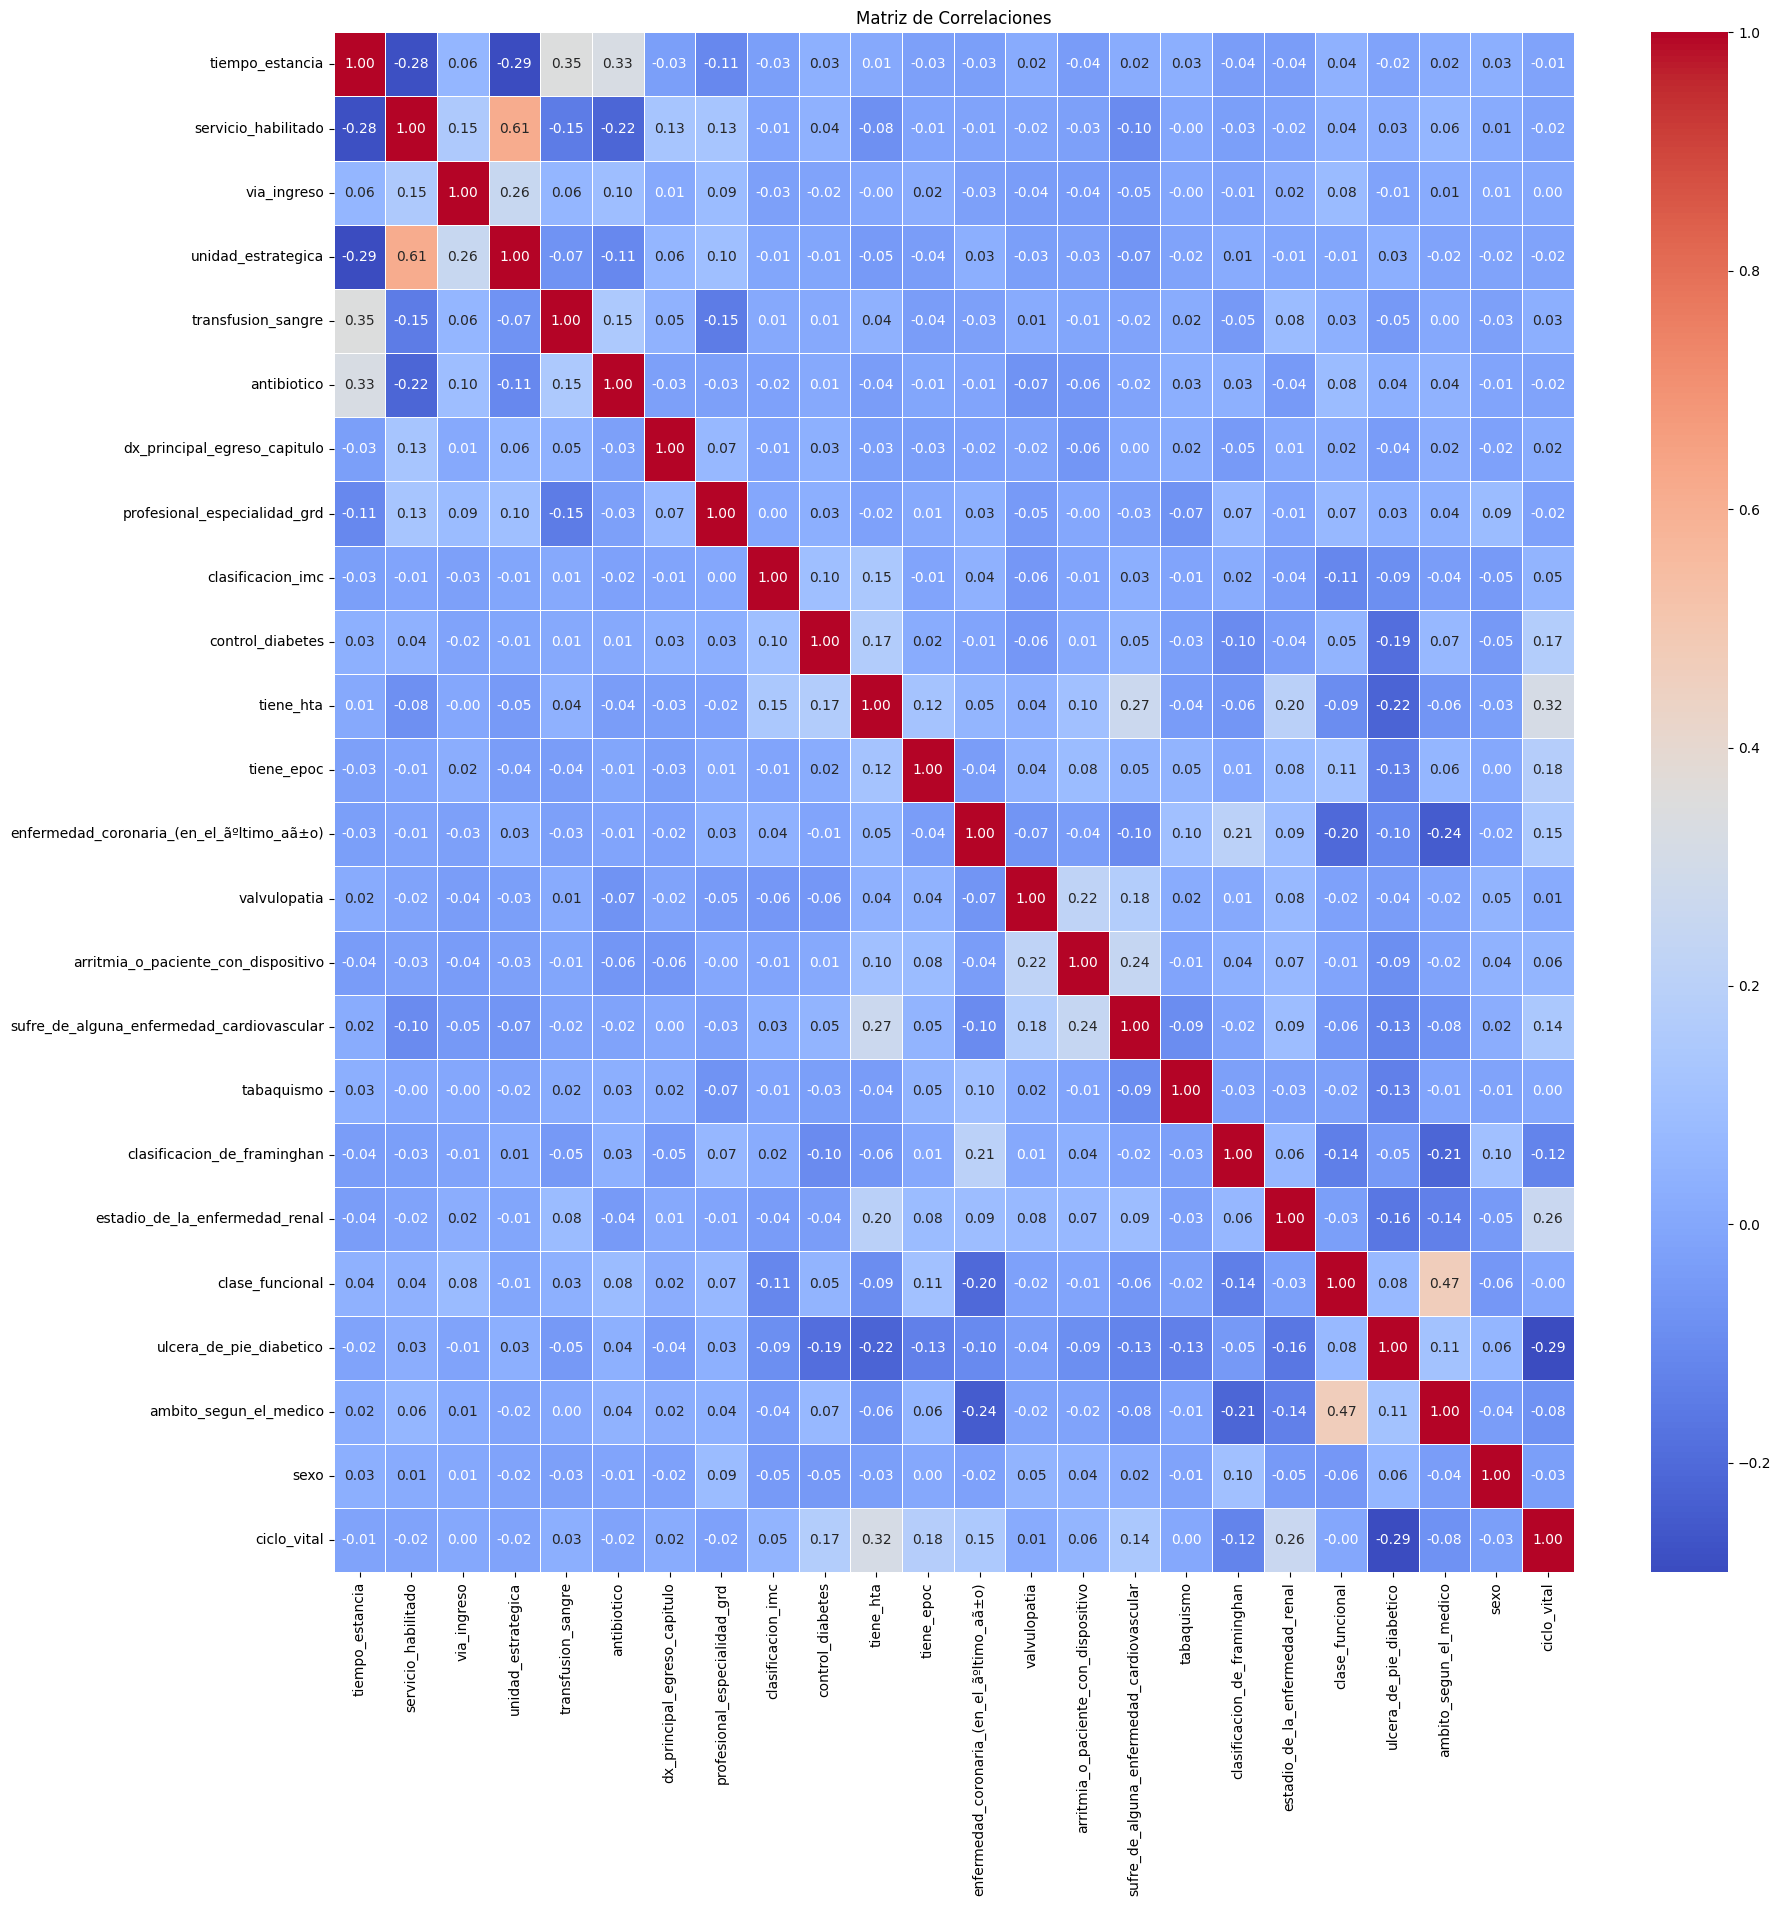

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'data' con las variables que deseas analizar
# data = pd.read_csv('tu_archivo.csv')  # Si los datos están en un archivo CSV

# Calcula la matriz de correlaciones
correlation_matrix = cor_cat.corr()

# Crea un mapa de calor (heatmap) para visualizar la matriz de correlaciones
plt.figure(figsize=(20, 20))  # Ajusta el tamaño de la figura según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlaciones')

# Muestra el gráfico
plt.show()

Se ha decidido eliminar las variables de "tipo de egreso", "calificacion (apoyo monopodal)" e "insuficiencia cardiaca" debido a su falta de correlación con la variable objetivo. Además, se optó por no incluir las variables 'remision', 'control_hta', 'calificacion_velocidad', 'calificacion_(indice_de_fragilidad)','diabetes_mellitus', 'tipo_diagnostico_principal', 'servicio_admite' ya que esta mostraba una alta correlación con otras variables.

In [28]:
cat.drop(['remision', 'control_hta', 'calificacion_velocidad', 'calificacion_(indice_de_fragilidad)','diabetes_mellitus', 'tipo_diagnostico_principal','tipo_egreso','calificacion_(apoyo_monopodal)','insuficiencia_cardiaca','servicio_admite'], axis=1, inplace=True)

In [29]:
df_sel = pd.concat([cat, num2], axis=1)
df_sel

,servicio_habilitado,via_ingreso,unidad_estrategica,transfusion_sangre,antibiotico,dx_principal_egreso_capitulo,profesional_especialidad_grd,clasificacion_imc,control_diabetes,tiene_hta,...,frecuencia_cardiaca_en_reposo,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,2,1,1,0,0,1,17,2,3,1,...,62,91655.0,94.65,95.8,0.86,61.77,3.98,0.81,3,81.0
1,2,1,1,0,0,1,17,3,0,0,...,71,72233.0,131.56,0.0,0.00,0.00,1.28,1.24,1,89.0
2,2,2,1,0,0,6,17,1,3,1,...,108,102557.0,61.00,123.0,0.61,61.54,0.00,0.00,0,82.0
3,2,2,1,0,0,7,2,3,3,1,...,64,100415.0,0.00,119.2,0.85,59.38,0.15,1.32,0,84.0
4,2,2,1,0,1,8,14,2,1,1,...,86,306817.0,0.00,150.7,0.81,151.23,19.67,0.78,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,2,2,1,0,1,7,2,1,2,1,...,120,112662.0,134.51,445.0,0.59,78.92,0.00,0.87,2,73.0
1469,3,2,3,0,0,15,19,1,1,1,...,99,200539.0,0.00,70.1,1.12,42.19,2.15,1.18,0,86.0
1470,2,2,1,0,0,12,7,2,0,1,...,62,197575.0,0.00,0.0,0.00,0.00,0.00,0.77,0,74.0
1471,2,2,1,0,0,6,17,0,1,1,...,59,247335.0,0.00,0.0,0.00,0.00,0.00,0.00,0,96.0


In [30]:
#from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a tus datos (supongamos que tienes un DataFrame de pandas llamado 'data' con las características a escalar)
scaler.fit(df_sel)

# Transformar los datos y almacenarlos en una nueva variable
df_sel_sc = scaler.transform(df_sel)

df_sel_sc= pd.DataFrame(df_sel_sc, columns=df_sel.columns)

#joblib.dump(scaler, 'scaler.pkl')

In [31]:
df_sel_sc

,servicio_habilitado,via_ingreso,unidad_estrategica,transfusion_sangre,antibiotico,dx_principal_egreso_capitulo,profesional_especialidad_grd,clasificacion_imc,control_diabetes,tiene_hta,...,frecuencia_cardiaca_en_reposo,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,0.666667,0.5,0.333333,0.0,0.0,0.0625,0.586207,0.666667,1.000000,1.0,...,0.192661,0.187535,0.375595,0.068970,0.073067,0.214658,0.141486,0.065060,0.083333,0.765432
1,0.666667,0.5,0.333333,0.0,0.0,0.0625,0.586207,1.000000,0.000000,0.0,...,0.275229,0.147795,0.522063,0.000000,0.000000,0.000000,0.045503,0.099598,0.027778,0.864198
2,0.666667,1.0,0.333333,0.0,0.0,0.3750,0.586207,0.333333,1.000000,1.0,...,0.614679,0.209841,0.242063,0.088553,0.051827,0.213859,0.000000,0.000000,0.000000,0.777778
3,0.666667,1.0,0.333333,0.0,0.0,0.4375,0.068966,1.000000,1.000000,1.0,...,0.211009,0.205458,0.000000,0.085817,0.072218,0.206353,0.005332,0.106024,0.000000,0.802469
4,0.666667,1.0,0.333333,0.0,1.0,0.5000,0.482759,0.666667,0.333333,1.0,...,0.412844,0.627775,0.000000,0.108495,0.068819,0.525542,0.699253,0.062651,0.000000,0.283951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.666667,1.0,0.333333,0.0,1.0,0.4375,0.068966,0.333333,0.666667,1.0,...,0.724771,0.230517,0.533770,0.320374,0.050127,0.274256,0.000000,0.069880,0.055556,0.666667
1469,1.000000,1.0,1.000000,0.0,0.0,0.9375,0.655172,0.333333,0.333333,1.0,...,0.532110,0.410321,0.000000,0.050468,0.095157,0.146615,0.076431,0.094779,0.000000,0.827160
1470,0.666667,1.0,0.333333,0.0,0.0,0.7500,0.241379,0.666667,0.000000,1.0,...,0.192661,0.404256,0.000000,0.000000,0.000000,0.000000,0.000000,0.061847,0.000000,0.679012
1471,0.666667,1.0,0.333333,0.0,0.0,0.3750,0.586207,0.000000,0.333333,1.0,...,0.165138,0.506070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950617


In [32]:
# Se convierte a CSV
df_sel_sc.to_csv('DBs\df_sel.csv', index=True)
y.to_csv('DBs\y.csv', index=True)